### Decision Tree

In [1]:
# It is a type of learning which uses form of decision tree where node splits based on information metrics
# split data based on info from data
# which means we need maths deinition of info and ability to measure it

In [2]:
# Regression three
# Pruning shortening the length of tree cutting the leaf nodes and changeing particular parent node

In [3]:
# Gini impurity-Most common ingo of decision tree
# as ameasurement of class uniformity or how 'pure' the ingfo of dataset is
# it is a curve max probablity at 0.5 for gini index
# as eg- 4 balls are ther 2 red 2 blue
# class red (2/4)(1-2/4)=0.25
# class blue (2/4)(1/2/4)=0.25
# max probblity of gini impurity index=0.5
# if we make 1 red and 3 blue balls the gini index goes down from before it becomes more pure
# and more uniformity of blue class
# ig gini impurity 0 it means only one class is there

In [4]:
# if the goal of decision tree we can use it to split dat and minimise it at leaf nodes
# it means we are seperating classes effectively

In [5]:
# how decision tree is created from gini impurity
# choose root node and use it to compare info contained in feature of train data

In [6]:
# create decision tree for email is spam or not
# based on URL
# True spam yes=2,no=1
# False spam yes=1,no=3
# Now calculate gini impurity
# if data feature is more impure it gives more info post split
# left leaf node (2/3)(1-2/3)+(1/3)(1-1.3)=0.44
# right (1/4)(1-1/4)+(3/4)(1-3/4)=0.375
# Gini impurity for overall feature by taking weightage
# (3/7)*0.44+(4/7)*0.375=0.403
# if we have multiple feature? or multi categorical(except yes,no like red,blueor green)
# to solve for best root and split features

In [7]:
# Continuouse numeric feature for gini impurity
# First sort the data and use avg to split and use as N in Words<=N
# We need to check the avg which has lowest impurity split value if 0
# Means perfect split(good candidate to make it as a root node)

In [8]:
# multicategorical feature
# check gini for all categories
# or add in multiple categories together(all combinations and check for lowest impurity)
# Choose the root with lowest impurity and split it into most pure

In [9]:
# If we have a many features and overfitted trees and to add a hyperparameter which is decreasing the gini impurity means splitting the classes enough to add more info
# or maintain max depth of two potential layers more than that we'll prune or cutoff

In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv('../DATA/penguins_size.csv')

In [12]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [13]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [14]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [16]:
df=df.dropna()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [18]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [19]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [20]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [21]:
df[df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [24]:
df[df['species']=='Gentoo'].groupby('sex').describe().transpose()
# compare the mean of unknown with male and female for all columns
# more leaning twards female

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [31]:
# to change single cell value
df.at[336,'sex']='FEMALE'

In [32]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                  FEMALE
Name: 336, dtype: object

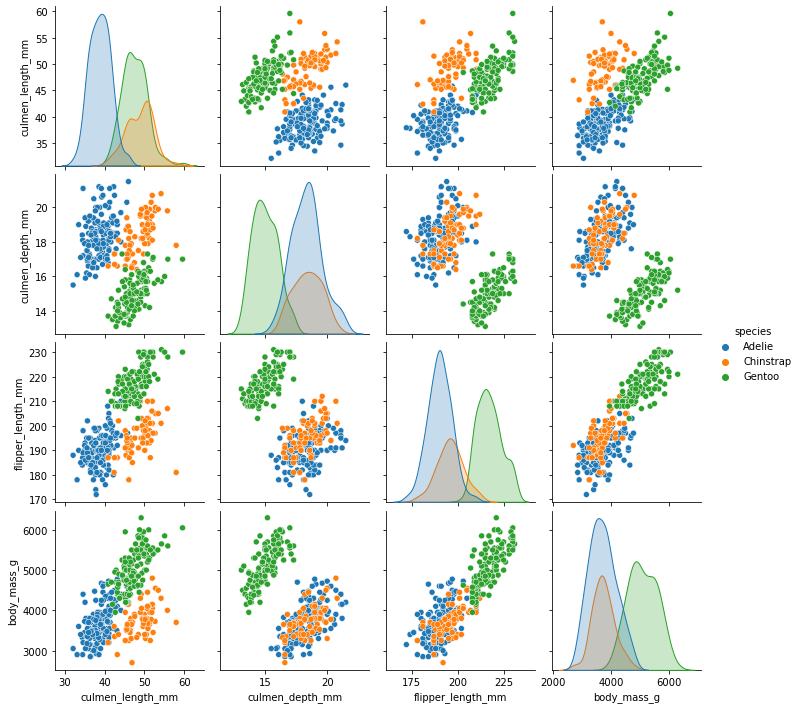

In [33]:
sns.pairplot(df,hue='species')

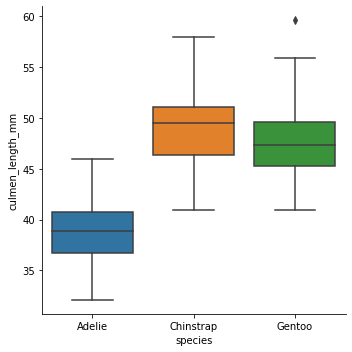

In [34]:
sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box')

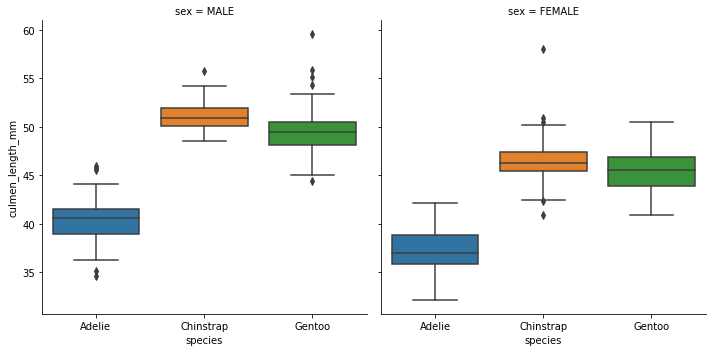

In [35]:
sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex')

In [36]:
df['island']

0      Torgersen
1      Torgersen
2      Torgersen
4      Torgersen
5      Torgersen
         ...    
338       Biscoe
340       Biscoe
341       Biscoe
342       Biscoe
343       Biscoe
Name: island, Length: 334, dtype: object

In [37]:
pd.get_dummies(df)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,1,0,0,1,0
340,46.8,14.3,215.0,4850.0,0,0,1,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,0,0,1,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,1,1,0,0,1,0


In [38]:
pd.get_dummies(df.drop('species',axis=1))

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,0,0,1,0
340,46.8,14.3,215.0,4850.0,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,1,0,0,1,0


In [40]:
X=pd.get_dummies(df.drop('species',axis=1),drop_first=True)

In [41]:
y=df['species']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
model=DecisionTreeClassifier()

In [47]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [48]:
base_preds=model.predict(X_test)

In [50]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [51]:
print(classification_report(y_test,base_preds))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



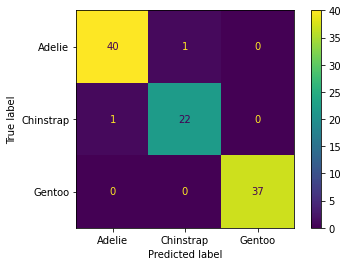

In [52]:
plot_confusion_matrix(model,X_test,y_test)

In [53]:
model.feature_importances_
# same oder as X features

array([0.32591819, 0.04203954, 0.54282921, 0.        , 0.07836008,
       0.        , 0.01085298])

In [54]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

In [55]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,
             columns=['Feature importance'])

,Feature importance
culmen_length_mm,0.325918
culmen_depth_mm,0.042040
flipper_length_mm,0.542829
body_mass_g,0.000000
island_Dream,0.078360
island_Torgersen,0.000000
sex_MALE,0.010853


In [56]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,
             columns=['Feature importance']).sort_values('Feature importance')

,Feature importance
body_mass_g,0.000000
island_Torgersen,0.000000
sex_MALE,0.010853
culmen_depth_mm,0.042040
island_Dream,0.078360
culmen_length_mm,0.325918
flipper_length_mm,0.542829


In [57]:
from sklearn.tree import plot_tree

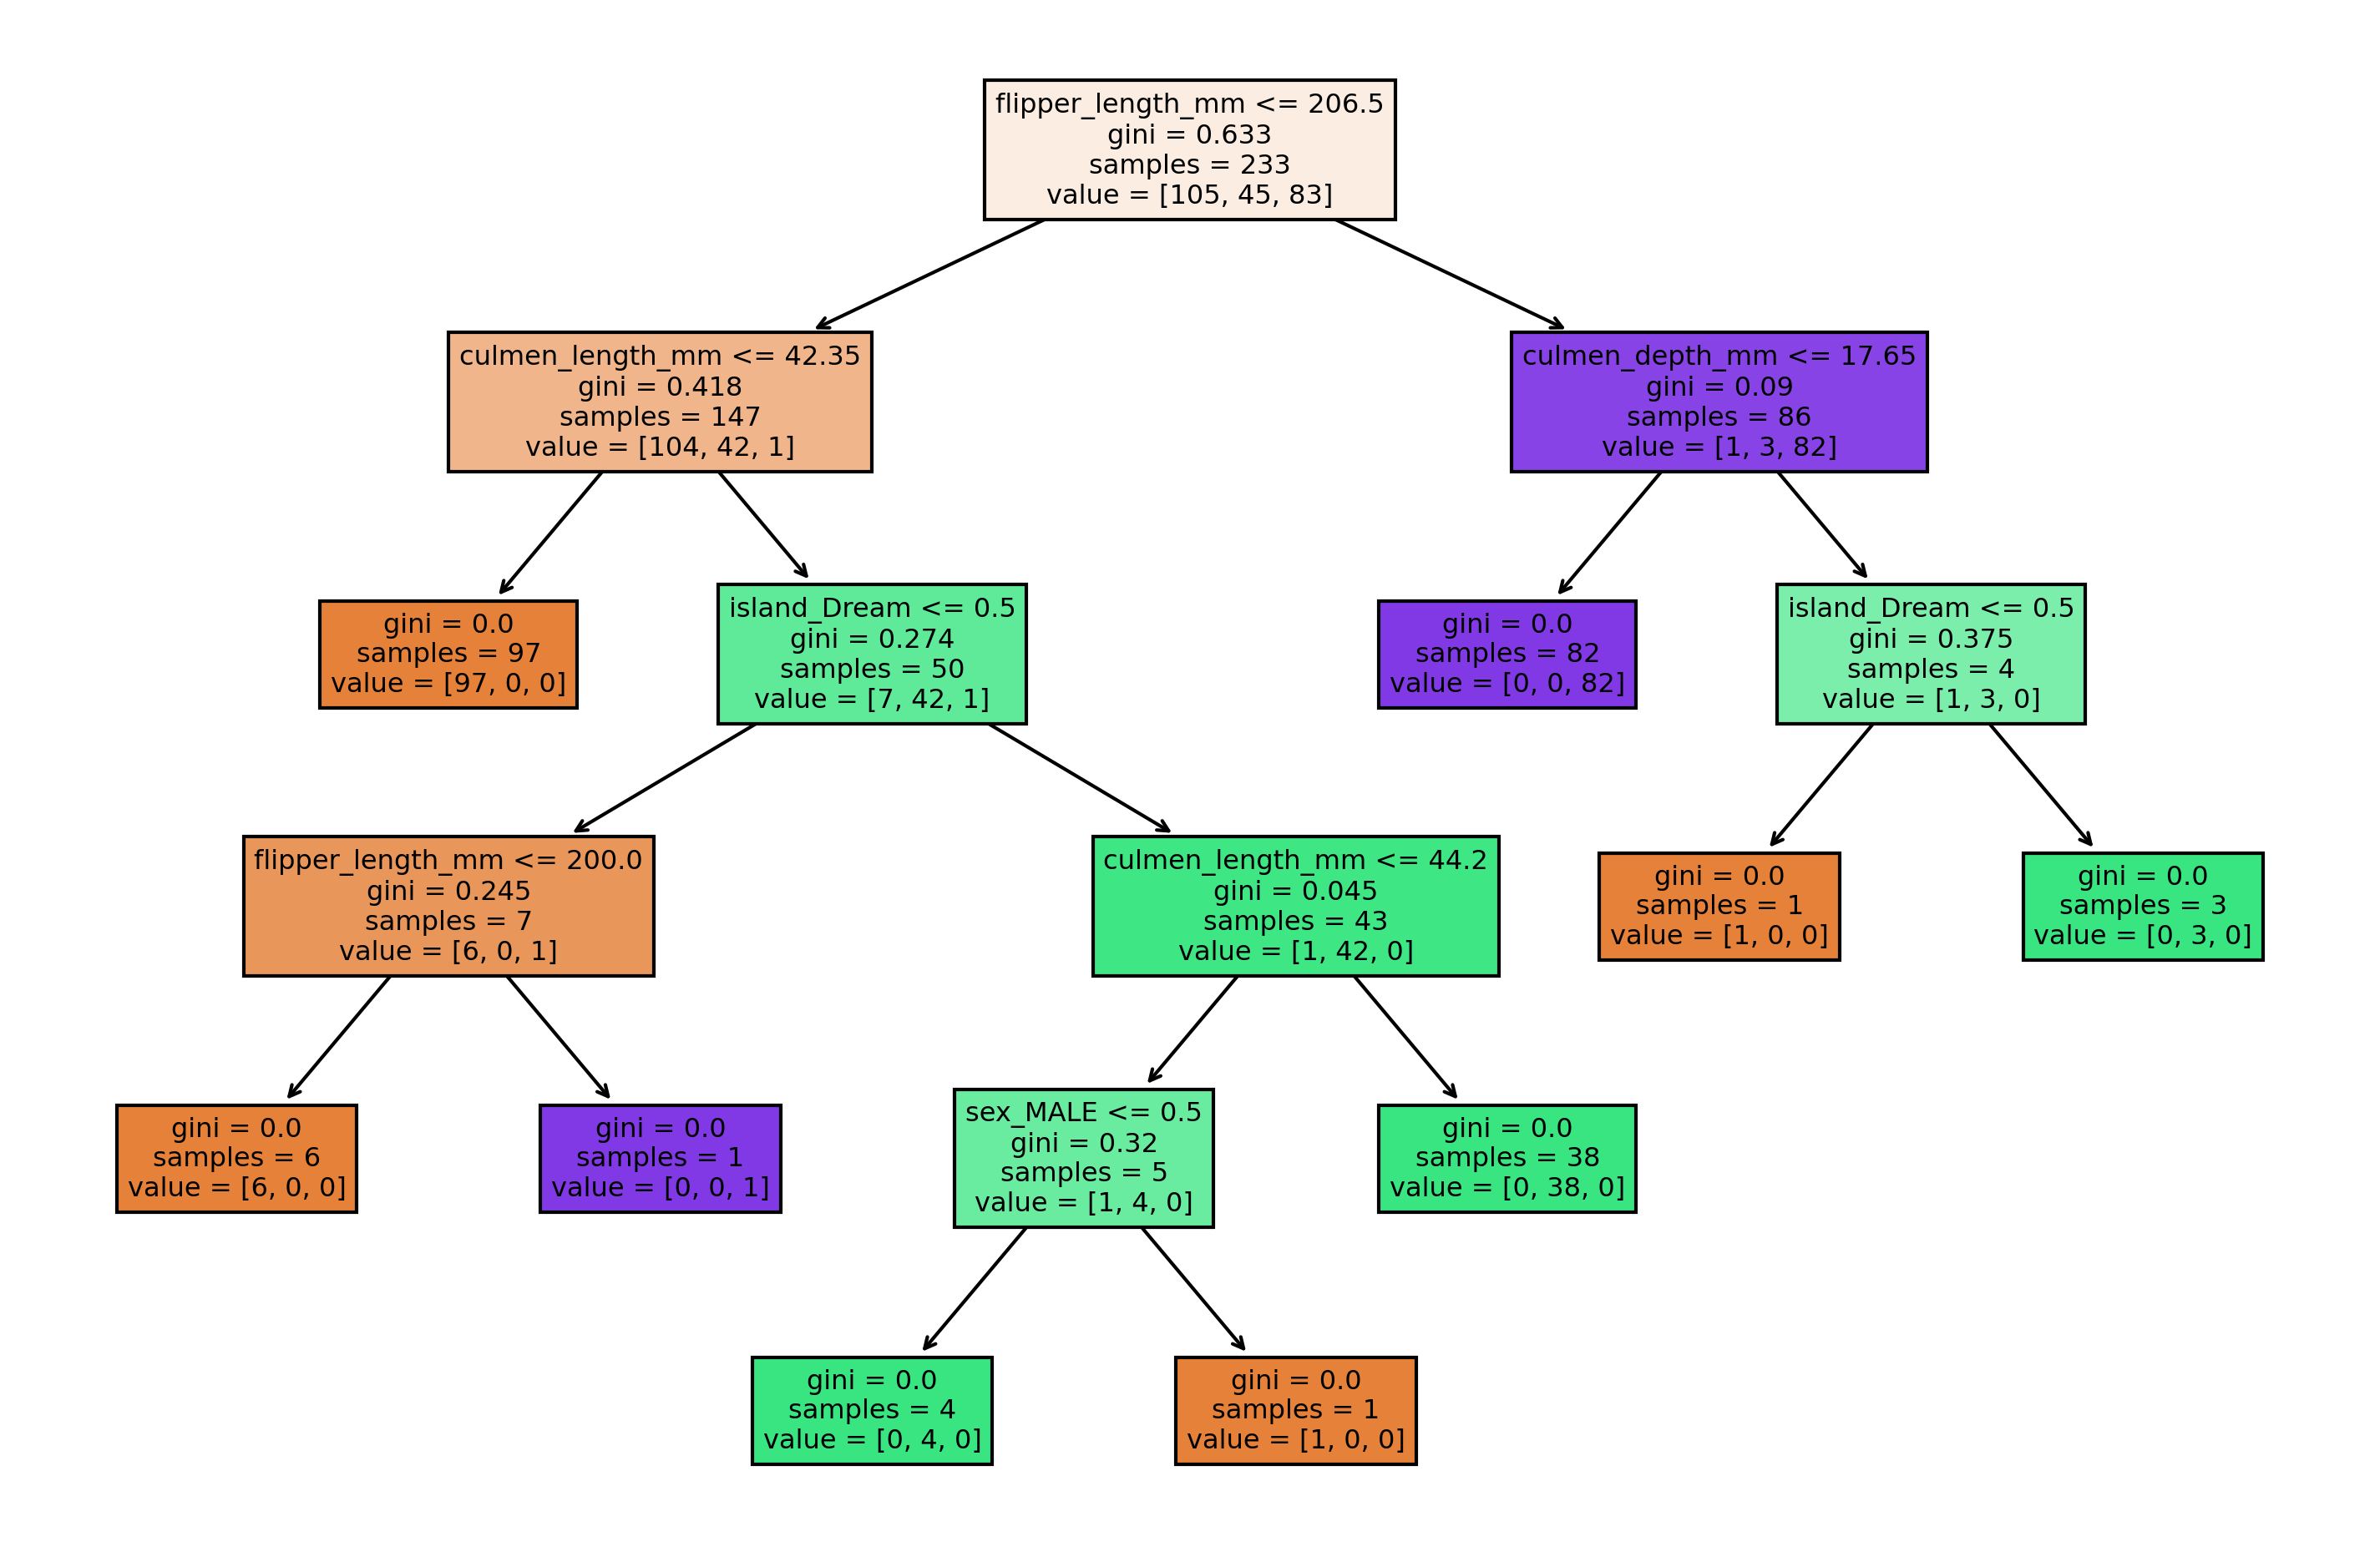

In [63]:
plt.figure(figsize=(12,8),dpi=300)
plot_tree(model,feature_names=X.columns,filled=True);
# X[2] third column

In [64]:
len(X_train)
# [105,45,83] labels or count of different species

233

In [66]:
def report_model(model):
    model_preds=model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=300)
    plot_tree(model,feature_names=X.columns,filled=True);

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101





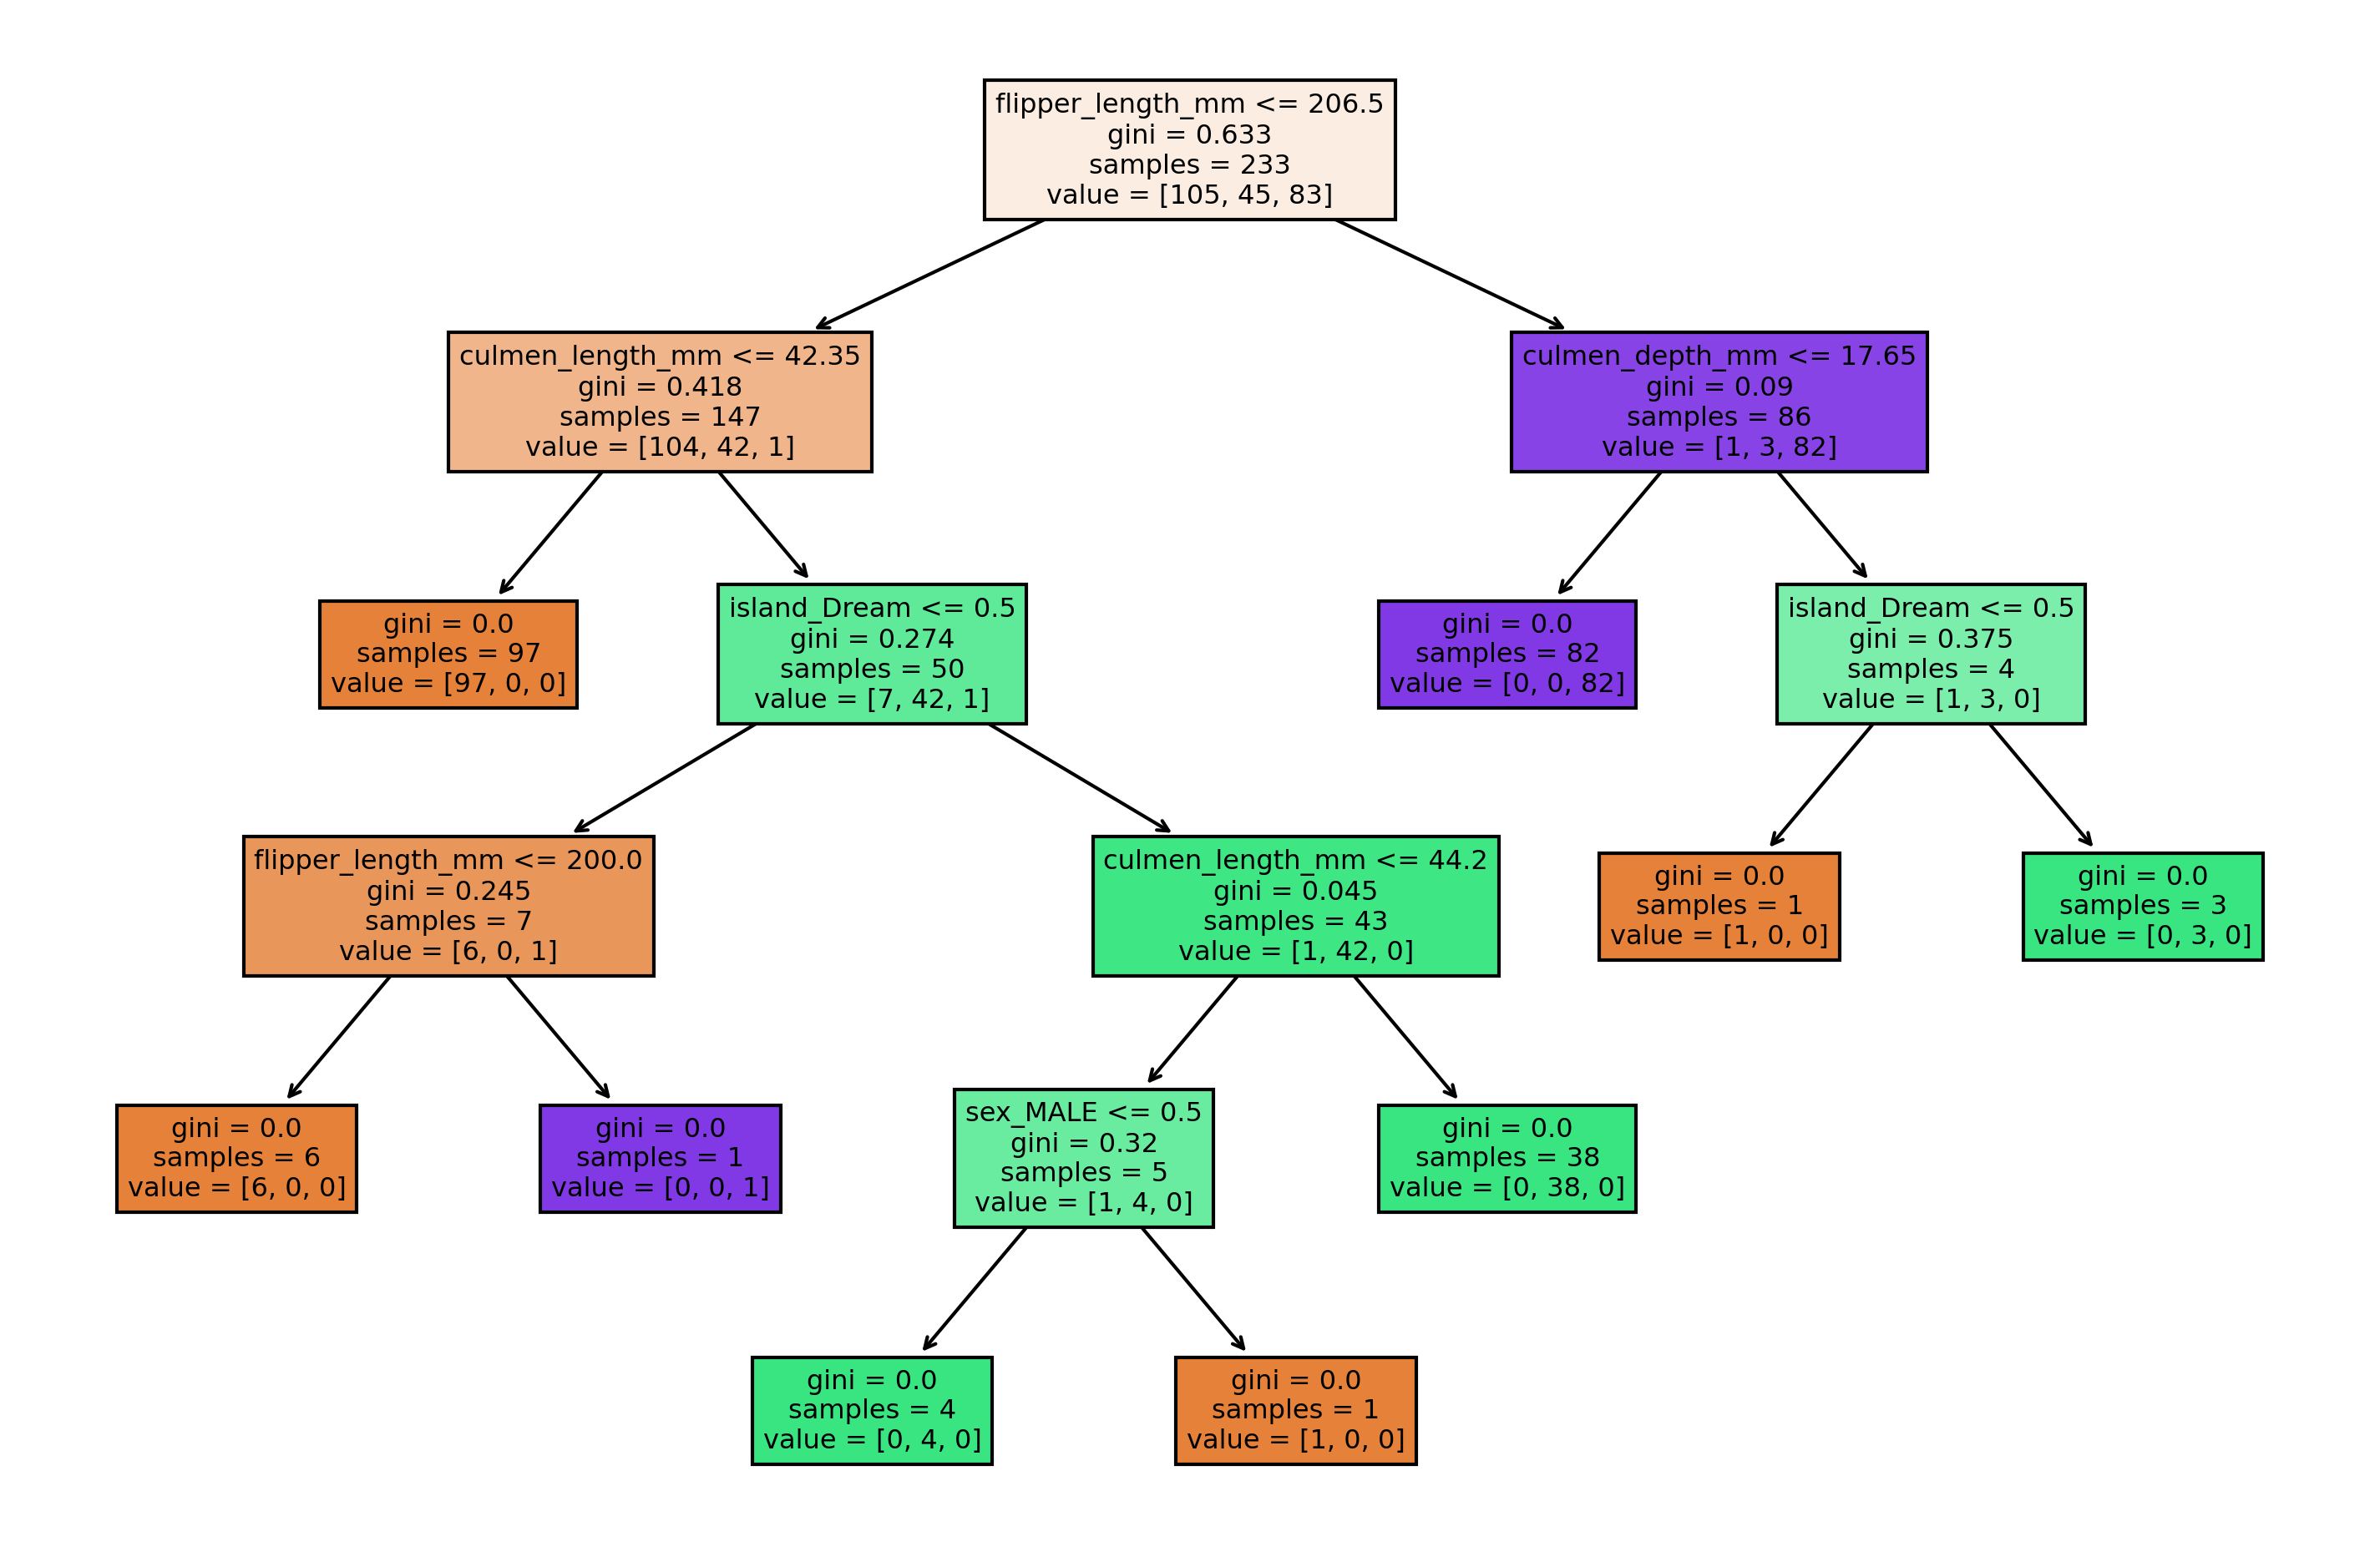

In [67]:
report_model(model)

In [68]:
# now we can play around with the different model with hyperparameter
# First hyperparameter (max_depth)
pruned_tree=DecisionTreeClassifier(max_depth=2)

In [69]:
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101





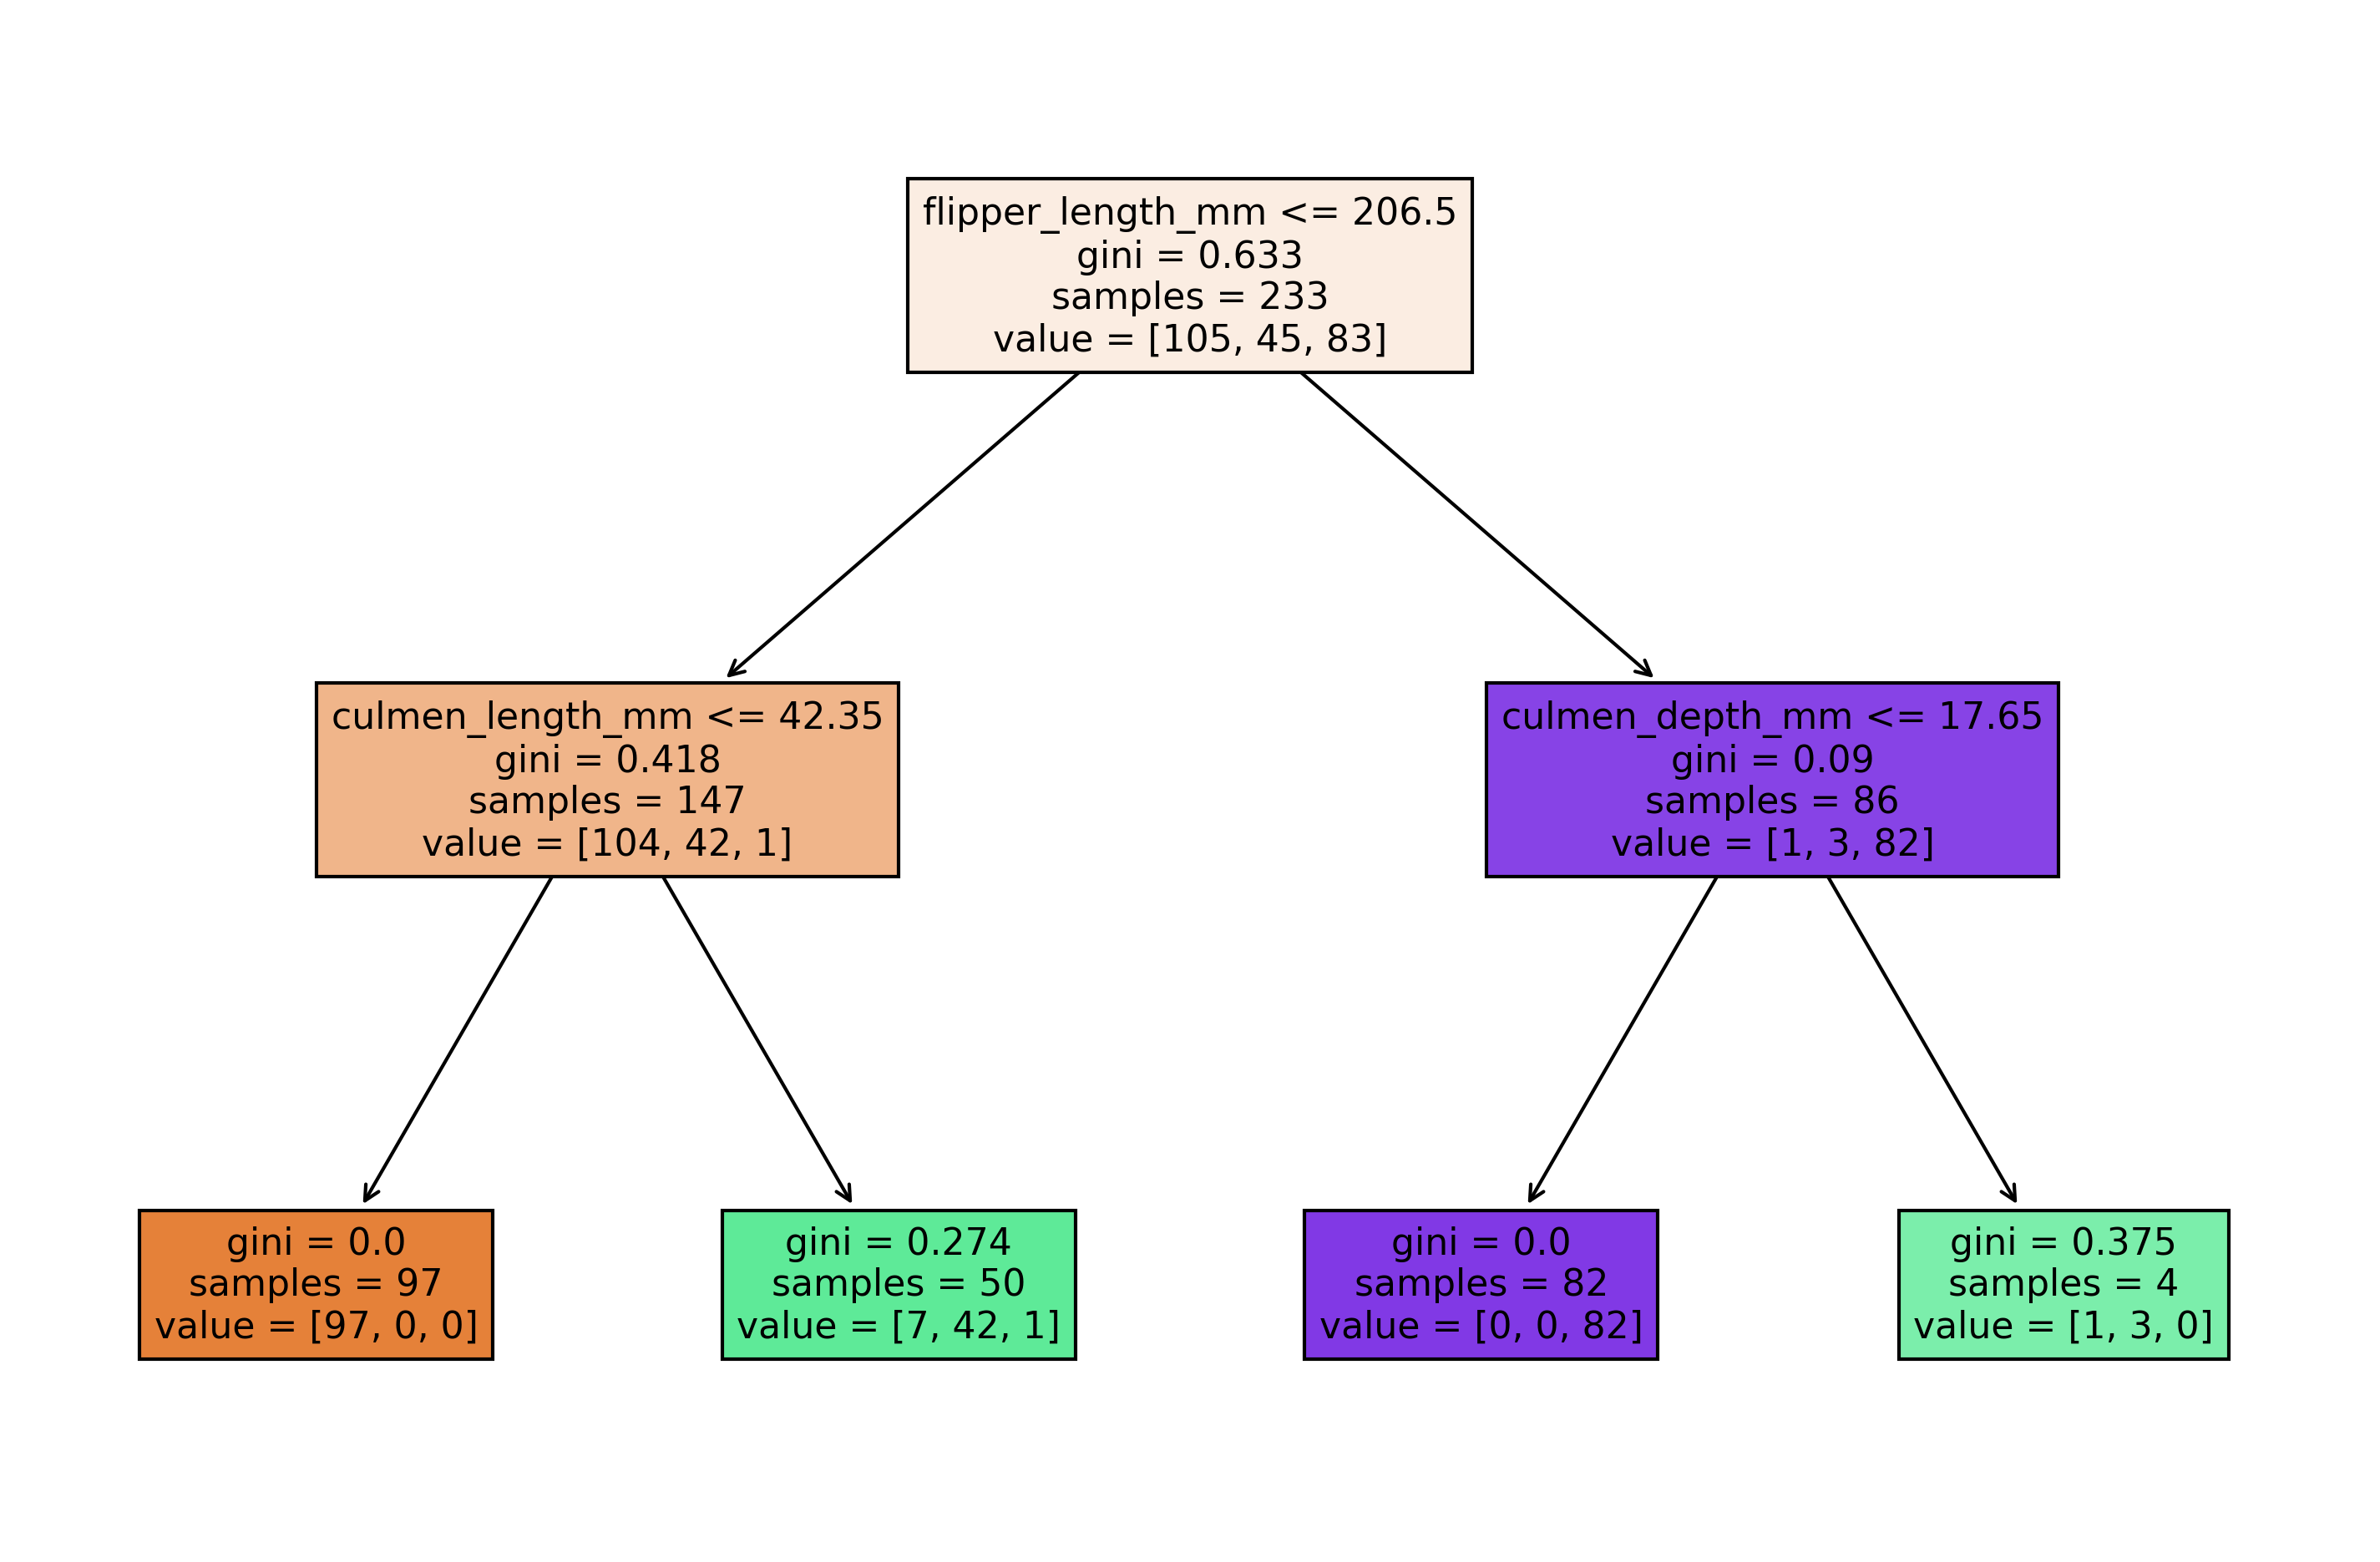

In [70]:
# cannot overfit to train data
report_model(pruned_tree)
# if no max then go till all the terminal nodes are pure

In [71]:
max_leaf_tree=DecisionTreeClassifier(max_leaf_nodes=3)

In [72]:
max_leaf_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.83      0.87      0.85        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.92       101
   macro avg       0.91      0.92      0.91       101
weighted avg       0.92      0.92      0.92       101





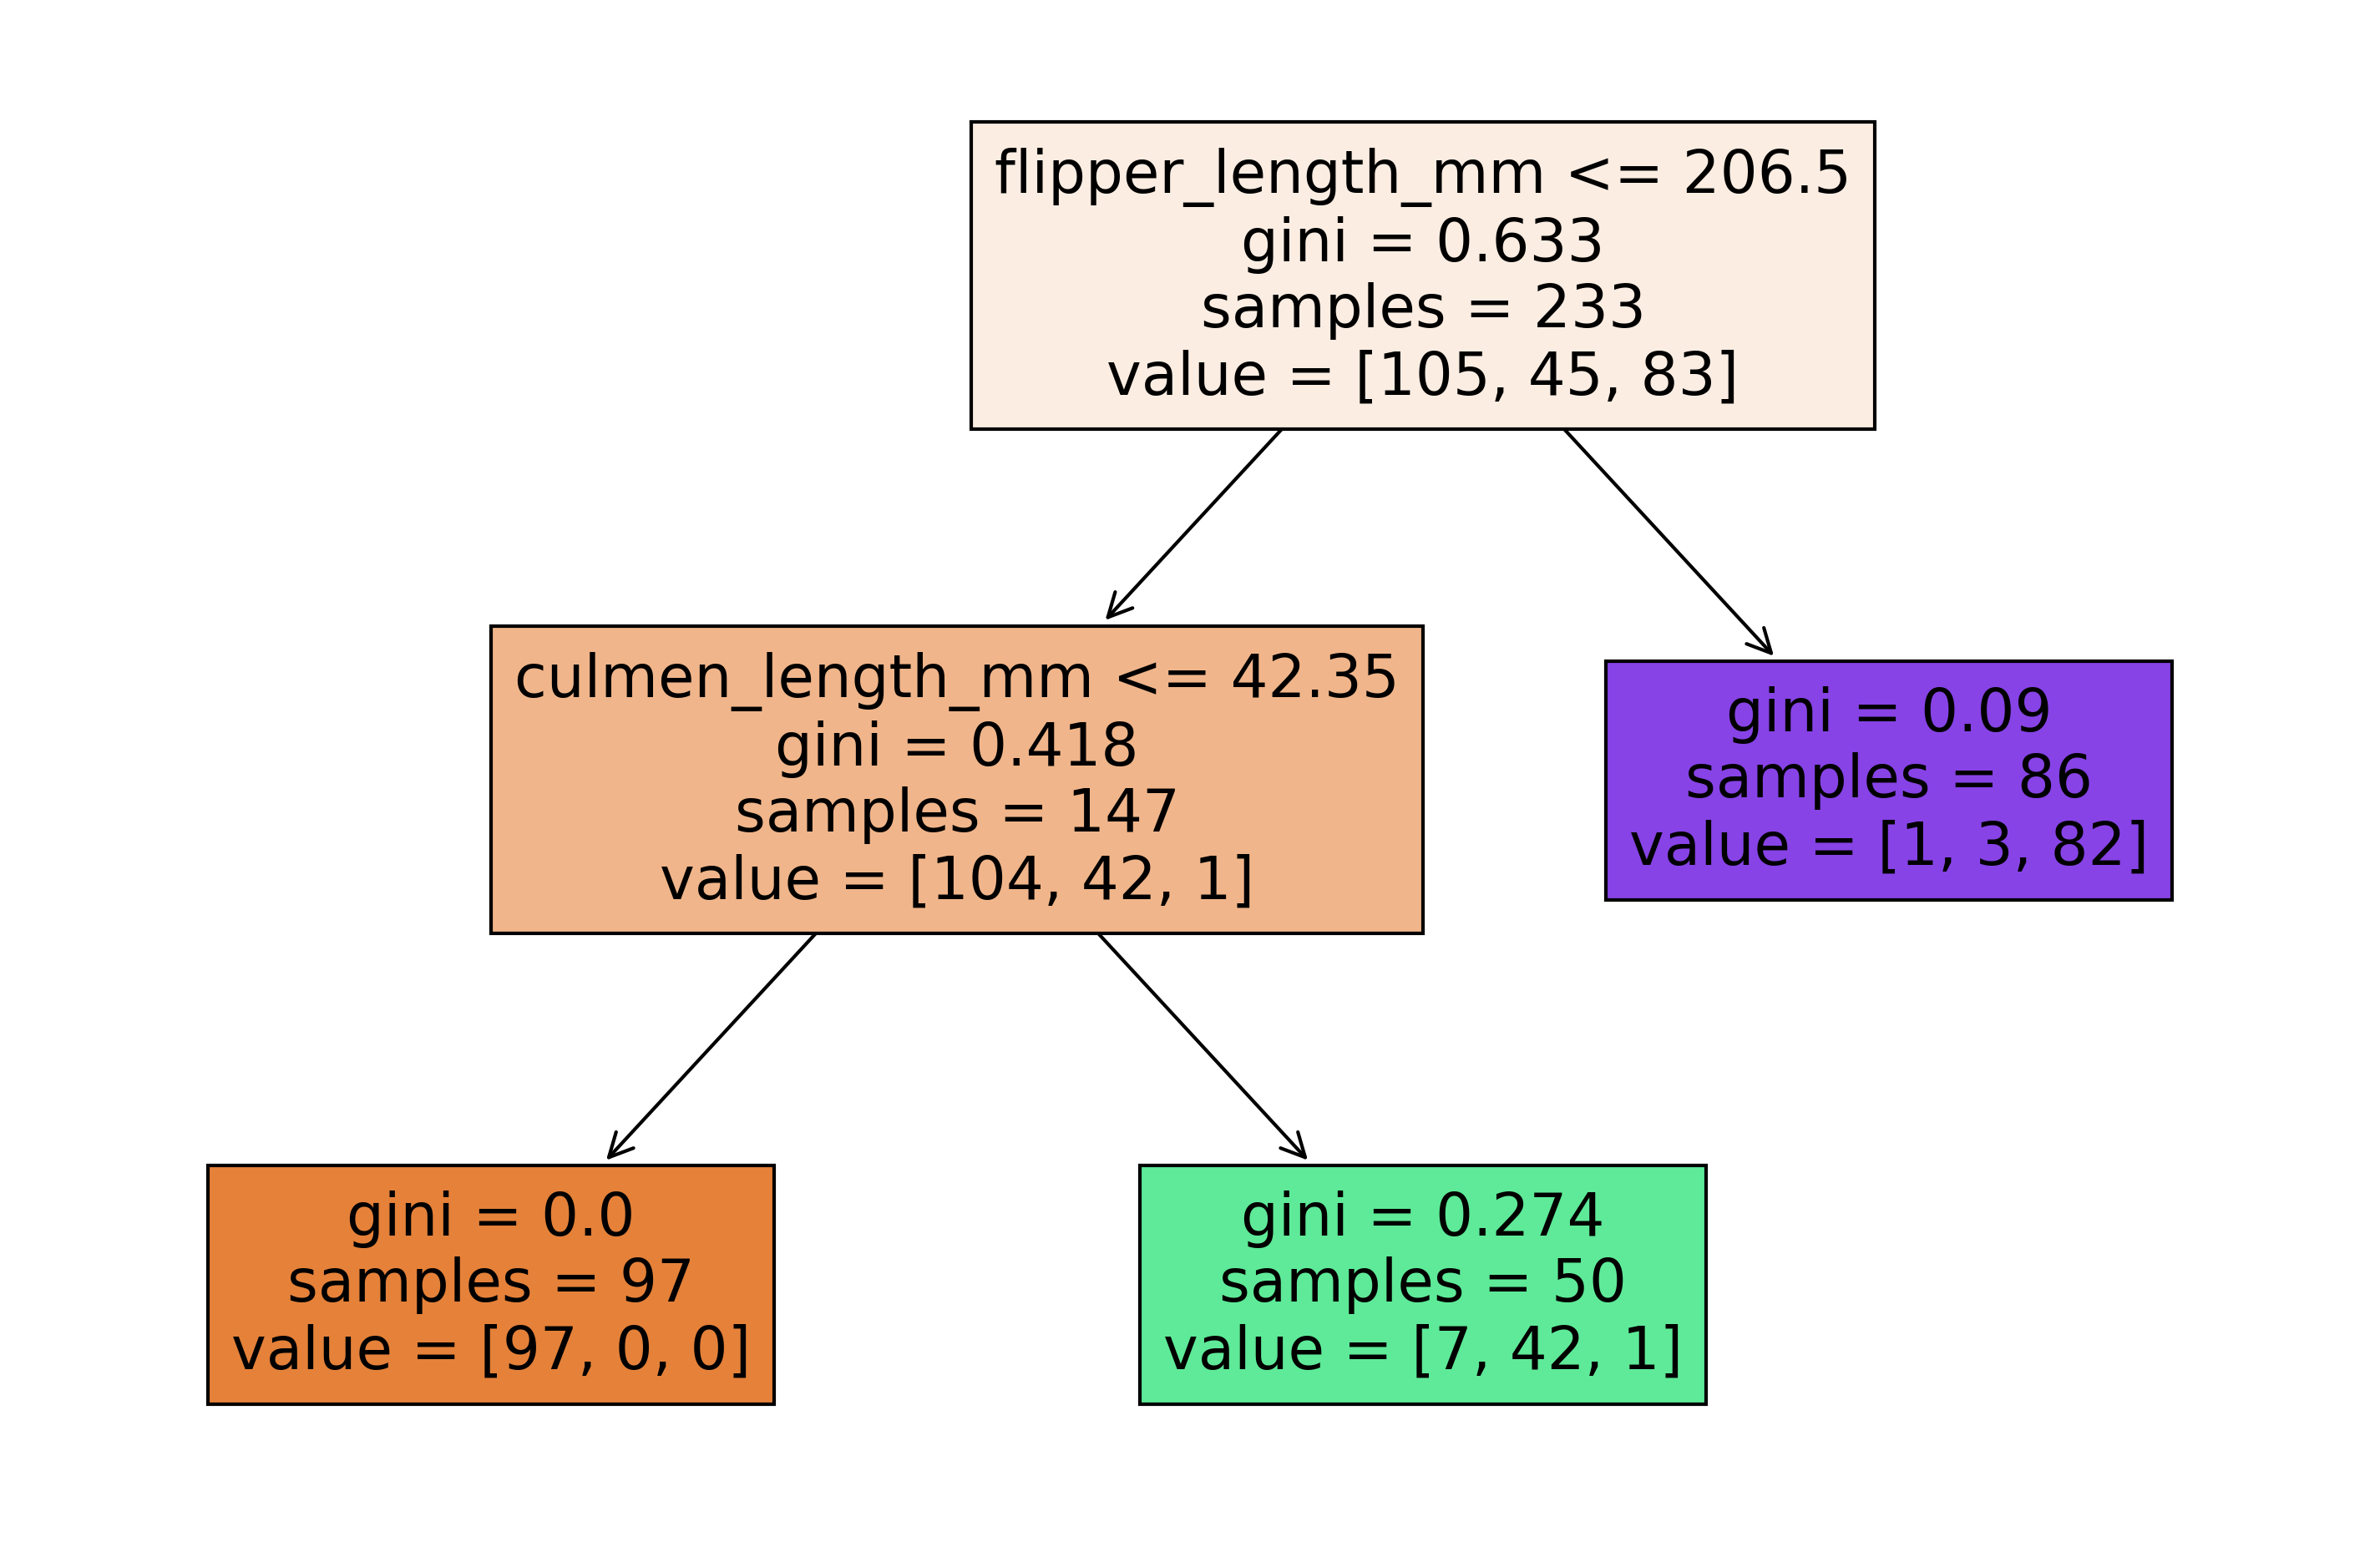

In [73]:
report_model(max_leaf_tree)

In [74]:
entropy_tree=DecisionTreeClassifier(criterion='entropy')

In [75]:
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101





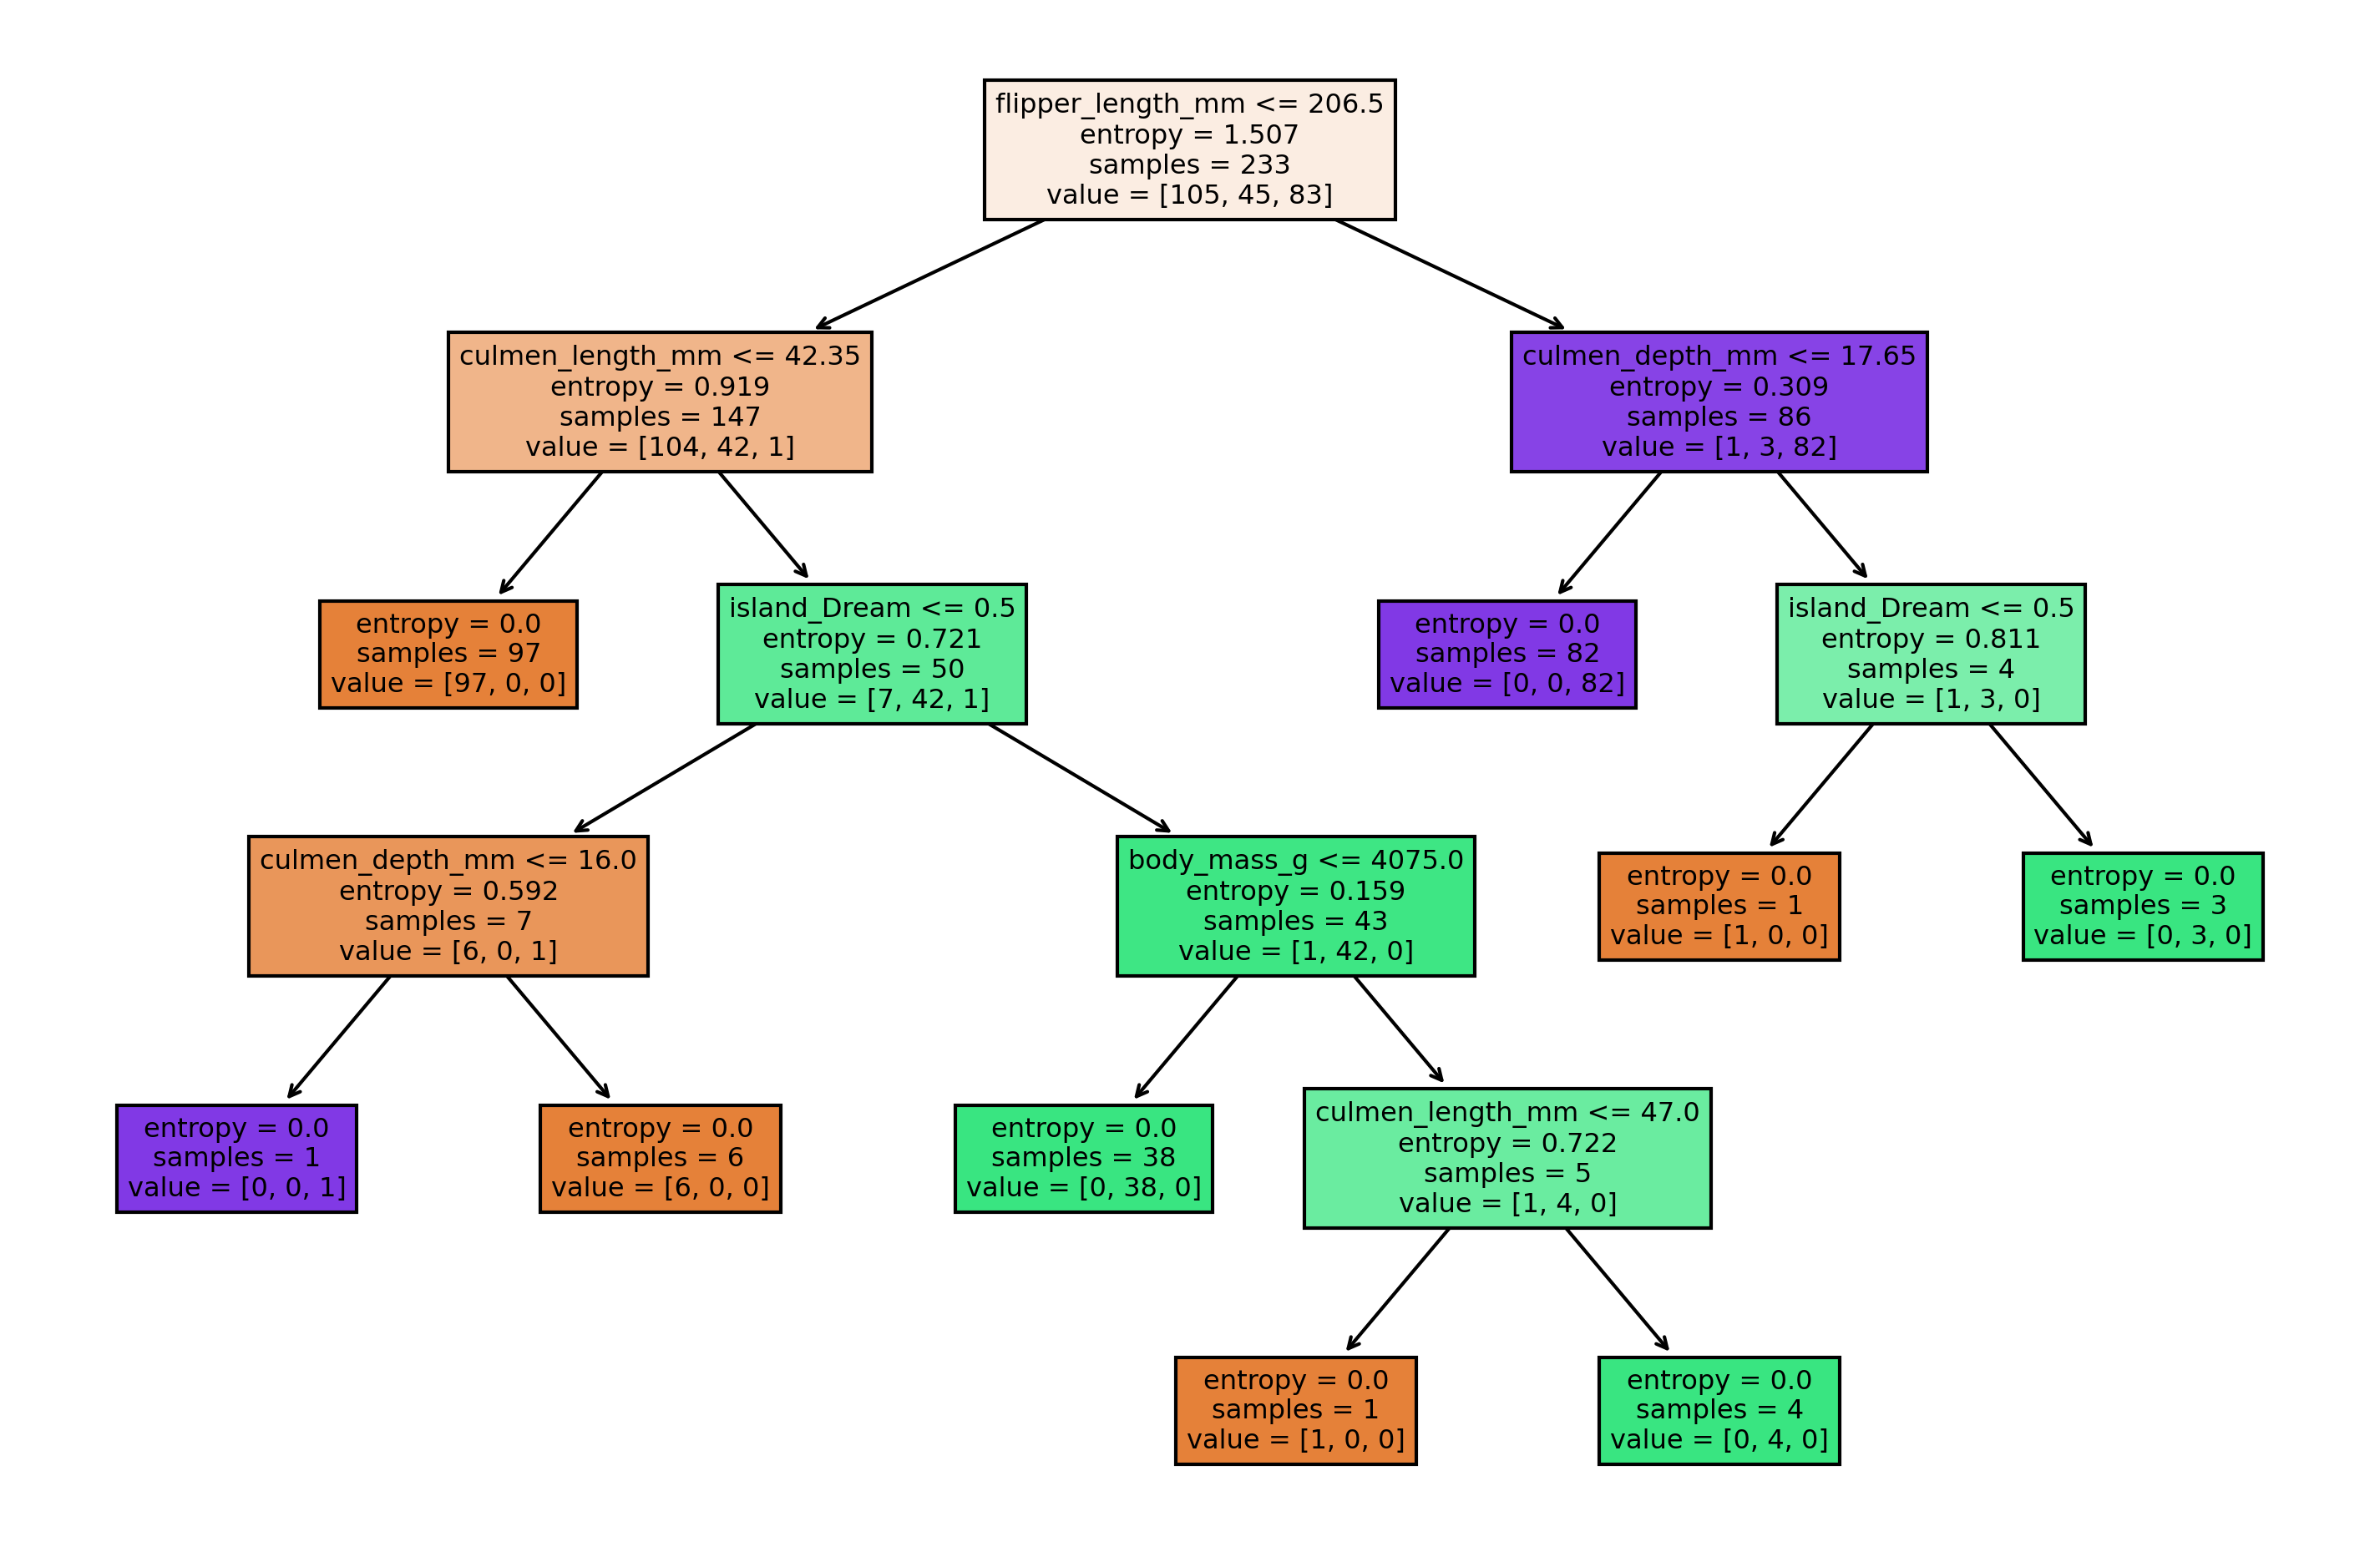

In [76]:
report_model(entropy_tree)

In [ ]:
# Grid search for best parameters on large data set with cross validation